In [1]:
''' 
Implementing Feed-forward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy
'''

' \nImplementing Feed-forward neural networks with Keras and TensorFlow\na. Import the necessary packages\nb. Load the training and testing data (MNIST/CIFAR10)\nc. Define the network architecture using Keras\nd. Train the model using SGD\ne. Evaluate the network\nf. Plot the training loss and accuracy\n'

In [2]:
# a. Import the necessary packages -->
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [3]:
# b. Load the training and testing data (MNIST/CIFAR10) -->
mnist = tf.keras.datasets.mnist                          #Importing MNIST dataset
# Splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

In [4]:
# c. Define the network architecture using Keras   -->
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# d. Train the model using SGD  -->
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6503 - accuracy: 0.8357 - val_loss: 0.3547 - val_accuracy: 0.9030
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.9062 - val_loss: 0.2934 - val_accuracy: 0.9175
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.9193 - val_loss: 0.2617 - val_accuracy: 0.9259
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9274 - val_loss: 0.2390 - val_accuracy: 0.9333
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2369 - accuracy: 0.9339 - val_loss: 0.2221 - val_accuracy: 0.9369


313/313 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.9369
Loss=0.222
Accuracy=0.937


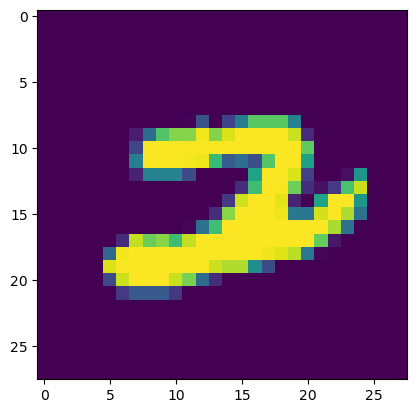

313/313 [==============================] - 0s 1ms/step


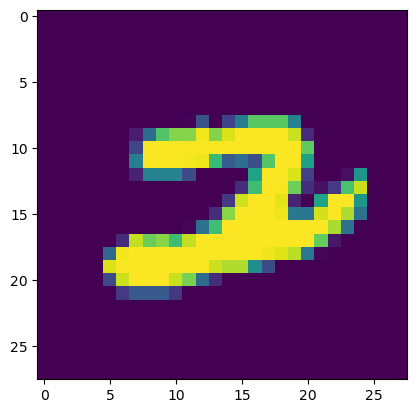

Predicted value:  [2.4792040e-03 4.9696413e-05 2.4742186e-01 7.5673196e-04 9.2580151e-03
 7.2461111e-03 4.4446923e-03 7.0780665e-01 1.4567908e-03 1.9080285e-02]


In [7]:
# e. Evaluate the network   -->
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('Predicted value: ', predicted_value[n])


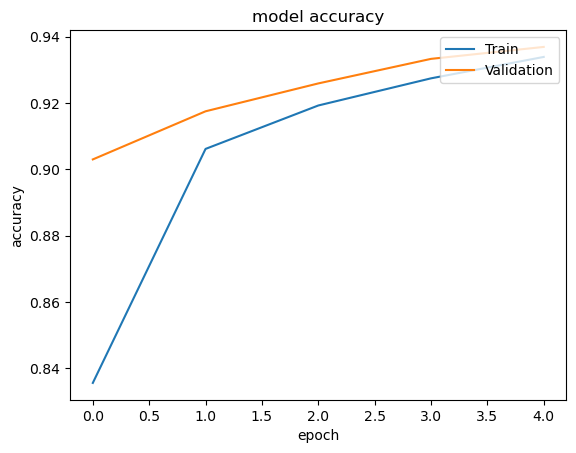

In [8]:
# f. Plot the training loss and accuracy  -->

#Plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


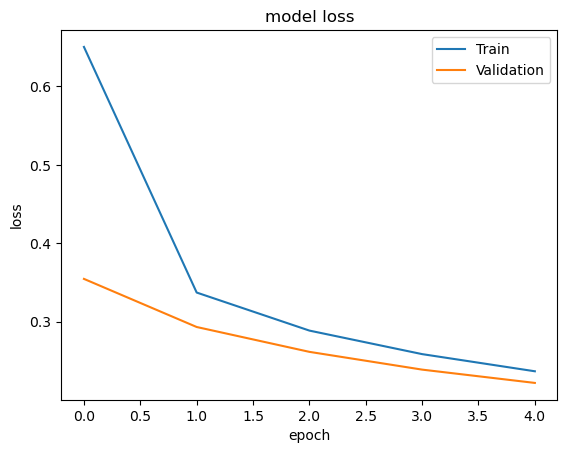

In [10]:
#Plotting the training loss  

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()